# Project 2: Using P-Value at Different Stages of Breast Cancer 

Julia Magaway, BIMM 143, Spring 2021

## Scientific Question: Which stage of breast cancer would more likely have an overexpressed level of TP53?  

The genetic molecular drivers can be found in RNA expression and in DNA altercations. These drivers can usually be seen in primary tumors and remained in metastatic cancer spreading. Most of the genetic molecular drivers were found to be DNA copy number changes. A TP53 mutation was the most recurrent in any subtype of breast cancer (Siegel et al., 2018).

The DNA copy number changes and the specific mutations on driver genes have been identified by an algorithm called DawnRank in 13 out of 16 patients used for the study. Most of the mutation data used for this algorithm came from The Cancer Gene Atlas(TCGA) and the National Library of Medicine. 

As stated on National Cancer Intitute website:
    "The Cancer Genome Atlas (TCGA), a landmark cancer genomics program, molecularly characterized over 20,000 primary cancer and matched normal samples spanning 33 cancer types." (https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga)
   
As stated on the National Center for Biotechnology website:
    "The National Center for Biotechnology Information advances science and health by providing access to biomedical and genomic information." (https://www.ncbi.nlm.nih.gov/) 
    
The paper uses a TNM system to explain the breast cancer stages of Caucasian and African American human subjects. The T refers to the size and the extent of the primary tumor. The N refers to nearby lymph nodes of the cancer already affected, while the M refers to how much the cancer has spread or metastized to other parts of the body. Usually, these stages are important in determining life expentancies and survival from the cancer. (https://www.cancer.gov/about-cancer/diagnosis-staging/staging)

  



## Scientific Hypothesis: If Caucasians are more likely to have their cancer metastasize, then there will be more overexpression of p53 in Caucasians than African Americans in all four breast cancer stages.

Cancer cells behave differently from normal cells since they can differ in growth rate, division rate, and apoptosis(cell suicide). These differences are caused by the differential expression of their genes such as the driver mutations in the study I am using. These differences in expression can be tested using p-values and a T-test. Any p-values below 0.05 will reject the null hypothesis and a large T-score will actually show that there is a significant difference in the Caucasian and African American TP53 expression. Finally, the data results can be displayed using a histogram and bar graph. These are significant in narrowing down the specific markers found in breast cancer and showing how strongly expressed they are in different stages.

To answer my scientific question and test my hypothesis, I had to first find the data of the entire study in the papeer. I was able to find an Excel sheet covering all of the Supplemental tables' data of the figures in the paper. There were eight tables total and I had to narrow down which tables had the TP53 driver data. I determined that Supplemental Table 3 and 5 had the most details about the expression of TP53 for all 16 patients. With this data, I made an entirely new Excel sheet and pasted the expression data with new columns of data containing: patient, race, stage, and finally the expressions. I turned this Excel sheet into a csv file and uploaded the csv file into Jupyter Notebook to be used for the dataframe. To do so, I had to import pandas in order for me to turn the csv file into a dataframe. These data were used for my P-values/T-test code, histogram, and bar graph. 

### Part 1: Load the packages

**os**: OS is a module that uses an operating system to interact with a system file and provides functions to create or remove a directory(folder). 

**Numpy**: NumPy is a package that is used when working with arrays and used for scientific libraries in Python programming. 

**Pandas**: Pandas is a package in python that is used in data analysis and machine learning tasks. This is used to create the histogram at the bottom. 

**matplotlib**: Matplotlib is a python plotting library that has functions in able to create plots, figurees, graphs, and more. This is used to create the histogram and bar graph at the bottom.

**Seaborn**: Seaborn is a library that can create statistical graphics and works well with the matplotlib and pandas. This is used to create the histogram at the bottom. 

**csv**: This is a plain text file format used in Python. It uses a specific structure in order to arrange data and given away by its name. This was used for my histogram at the bottom. 

**SciPy**: This is an open source library mostly used for mathematical, scientific, or technical problems. It allows the user to manipulate and visualize the data with a wide-range level of Python commands and is an extension to NumPy. 

**pubchempy**: PubChemPy allows the interaction with Pubchem in Python. It can be used for chemical searches by name, substrcuture, or chemical standardization. 

**rdkit**: RDKit is a toolkit with bindings for Python. It has different functionalities with open source projects mostly used for machine learning applications. 

**IPython.display**: This is a way for Python to display an image. Here, Python objects need to be formatted in order to be displayed. 

**itertools**: This is a module in Python. It can be used to iterate data strcutures, called iterables, using a for-loop. It can also incorporate functions that utilize computational resources to construct specialized tools efficiently in Python. 

In [189]:
# Import all needed packages correctly
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import itertools
import sys
from scipy import stats

### Part 2: Load in Data and Perform Bioinformatics Analyses

**p-value (T-Test):** We will be performing a one sided T-test usng p-values. These differences in gene/driver expression can be tested by p-value along with its T-test. By showing a p-value of P > 0.05, the probability that the hypothesis is true will be high, while a p-value of P < 0.05 will reject the hypothesis. This test will help determine whether there is a difference in p53 expression at different stages of breast cancer for Caucasians and African Americans. Along side this, it will show which group TP53 is expressed the most. Furthermore, a large T-score tells you that the Caucasian group's expression of TP53 are more overly expressed than African Americans. A small T-score tells you that both the groups' expression of TP53 are similar and have no significant difference.



In [191]:
# Testing to see whether I can separate the race, stage, and expression all at once
# Checking code tables/dataframe and whether the columns separated the two groups' data
print(df_patients.loc[(df_patients['Race'] == "Caucasian") & (df_patients['Stage'] == 1.0)])
print(df_patients.loc[(df_patients['Race'] == "African_American") & (df_patients['Stage'] == 1.0)])

            Patients       Race  Stage      TP53
78  A8.030222BSPIMET  Caucasian    1.0  0.004536
79        A8.LIV.MET  Caucasian    1.0  0.004327
80       A8.LUNG.MET  Caucasian    1.0  0.004584
81        A8.OVA.MET  Caucasian    1.0  0.004238
82       A8.SPIN.MET  Caucasian    1.0  0.003911
            Patients              Race  Stage      TP53
48    A28.AdrenalMet  African_American    1.0  0.004983
49  A28.DuraMaterMet  African_American    1.0  0.005186
50      A28.LivMet.1  African_American    1.0  0.004912
51   A28.LungMet.LLL  African_American    1.0  0.004631
52   A28.LungMet.RUL  African_American    1.0  0.004857
53   A28.PancreasMet  African_American    1.0  0.004718
54       A28.PT.FFPE  African_American    1.0  0.004623


In [181]:
# Stage 1: Caucasian vs African_American T-scores and P-values

# Use pandas to import the TP53 csv file as a dataframe
df_patients = pd.read_csv('TP53_patients.csv') 

# Setting different rsv files to each race
rvs1 = df_patients.loc[(df_patients['Race'] == "Caucasian") & (df_patients['Stage'] == 1.0)]
rvs2 = df_patients.loc[(df_patients['Race'] == "African_American") & (df_patients['Stage'] == 1.0)]

# compare T-test values of Caucasian and African_American 
# rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
# rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
# the hashtags in rsv1 and rsv2 are being used to test and check for errors 

print(stats.ttest_ind(rvs1["TP53"],rvs2["TP53"]))

Ttest_indResult(statistic=-3.8520470215322864, pvalue=0.0032015113903014285)


In [190]:
# Finding the rest of the p-values and T-scores for the other three stages (Stage 1 results still included)

# Use a for loop in pandas Dataframe to compile a list 
# Instead of inputting actual Stage values in the rsv for loop, "i" replaced it in order to input multiple values
# the "i" in the for loop will range from stages 1 to 4
for i in range(1,5):
    # Defining the list with the imported datas of each race
    rvs1 = df_patients.loc[(df_patients['Race'] == "Caucasian") & (df_patients['Stage'] == i)]
    rvs2 = df_patients.loc[(df_patients['Race'] == "African_American") & (df_patients['Stage'] == i)]
    # printing both the rsv to give the T-scores and P-values
    print(stats.ttest_ind(rvs1["TP53"],rvs2["TP53"]))
# printing all four stages' T-scores and P-values    
print(i)

Ttest_indResult(statistic=-3.8520470215322864, pvalue=0.0032015113903014285)
Ttest_indResult(statistic=0.5872164842220065, pvalue=0.5614521769733374)
Ttest_indResult(statistic=2.39899029717332, pvalue=0.03358042048460473)
Ttest_indResult(statistic=-0.2905453031996186, pvalue=0.7740027774961444)
4


### Part 3: Create a histogram showing the overexpression of p53 in Caucasians and African Americans at different stages.

**Bar Graph:** Here we are using matplotlib to create a bar graph that will be printed out below. We used and added X axis labels along with Y axis ticks for the bars. We had to use the mean and standard deviation to display the number of patients correctly which is shown below. Bar graphs are important in showing the different patterns and trends of different groups, in this case the different driver mutations. This bar graph displays the most reoccuring driver in the cancer patients that were being tested which is TP53(found in 13 out of 16 breast cancer patients). The bar graph only included the luminal breast cancer mutations since the other markers for basal specific breast cancer mutations were only found in a maximum of 2 out of 16 patients. 

**Histogram:** The matplotlib was also used to create a histogram plot. The X and Y axis are showing the frequenciees of the TP53 driver in 83 tumors found in the patients. Histograms are important in showing the distribution pattern of the TP53 marker data. It is used to display the frequencies of a large data set. Histograms give a great visual representation of the presented data as well. 

In [193]:
# Use pandas to import the TP53 csv file as a dataframe
df_patients = pd.read_csv('TP53_patients.csv')
# Checking the data table and the different columns to use for the graphs
df_patients.head()
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Patients  83 non-null     object 
 1   Race      83 non-null     object 
 2   Stage     83 non-null     float64
 3   TP53      83 non-null     float64
dtypes: float64(2), object(2)
memory usage: 512.1+ KB


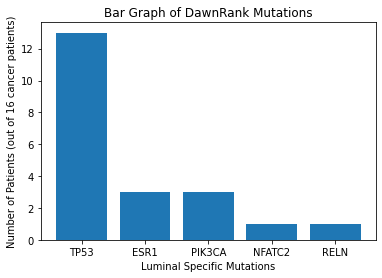

In [89]:
# import packages
df = pd.read_csv('Supplemental_Figure_3 .csv')
from statistics import mean, stdev

TP53 = [13,13]
ESR1 = [3,3]
PIK3CA = [3,3]
NFATC2 = [1,1]
RELN = [1,1]

# find the mean using the mean() function from the statistics library
TP53_mean = mean(TP53)
ESR1_mean = mean(ESR1)
PIK3CA_mean = mean(PIK3CA)
NFATC2_mean = mean(NFATC2)
RELN_mean = mean(RELN)

# find the standard deviation using the stdev() function from the statistics library
TP53_stdev = stdev(TP53)
ESR1_stdev = stdev(ESR1)
PIK3CA_stdev = stdev(PIK3CA)
NFATC2_stdev = stdev(NFATC2)
RELN_stdev = stdev(RELN)

# build a bar plot with labels
plt.bar(['TP53','ESR1','PIK3CA', 'NFATC2', 'RELN'],[TP53_mean, ESR1_mean, PIK3CA_mean, NFATC2_mean, RELN_mean])
plt.xlabel('Luminal Specific Mutations')
plt.ylabel('Number of Patients (out of 16 cancer patients)')
plt.title('Bar Graph of DawnRank Mutations')
plt.show()

<AxesSubplot:ylabel='Frequency'>

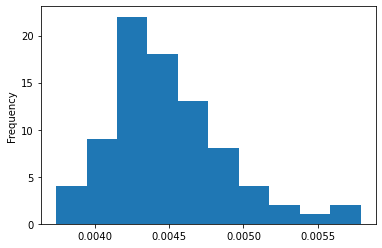

In [166]:
# Input the TP53 column in the patients dataframe of the histogram plot 
df_patients['TP53'].plot(kind='hist')

### Part 4: Analysis of Results

The data for the bar graph and histogram was derived from the article "Integrated RNA and DNA sequencing reveals early drivers of metastatic breast cancer"(Siegel et al., 2018). Though there was about 110 mutations that were identified as drivers in the 16 patients, only one appeared in 13 of the patients' primary tumors which was the TP53. TP53 is one of the founding mechanisms of the most aggressive and lethal breast cancer. This marker was found in both basal-like and luminal breast cancers. The TP53 mutation was always found in the primary tumor and was maintained in every metastasis from that patient. It was also the only mutation driver present and commonly found across all subtypes of breast cancer metastases. The histogram above displays all the DawnRank frequencies that were obtained from both Caucasians and African Americans that have the TP53 driver in their primary tumors. There was a total of 83 tumors found with TP53 in the 16 patients used for the study. The frequencies display the strength of the TP53 driver expressions in the 83 tumors found. 

Both of the graphs are showing how TP53 is being expressed at different breast cancer stages of primary tumors. According to the code above, there is only an overexpression of p53 appearing in Caucasians in breast cancer stages 1 and 3. In stages 1 and 3, the p-values were below 0.05 (P < 0.05), which will reject the null hypothesis meeaning that the expressions for Caucasians and African Americans do have a significant difference. The p-values for stages 2 and 4 are above 0.05, accepting the null hypothesis meaning there is not a significant difference in TP53 expressions in these stages. Though the scientific question has been answered on which stages show the overexpression of TP53, the scientific hypothesis is still incorrect since there was only overexpression of TP53 in **stages 2 and 4** of breast cancer for Caucasians and not all four stages. 